Trabajo Práctico 3

In [43]:
# LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat

In [40]:
# FUNCIONES

def initializeWeights(shape, scale=0.1):
    return np.random.uniform(-scale, scale, shape)

def neighborhoodFunction(distance, sigma):
    return np.exp(-distance**2 / (2 * sigma**2))

# Distribuciones uniformes
# Círculo
def uniformCircleInit(N, radius=1, center=(0., 0.)):
    r = np.sqrt(np.random.uniform(0, radius, N))
    phi = np.random.uniform(0, 2 * np.pi, N)
    return np.array([r * np.cos(phi), r * np.sin(phi)]).T + center
# Anillo
def uniformRingInit(N, innerRadius=0.5, outerRadius=1.0, center=(0., 0.)):
    r = np.sqrt(np.random.uniform(innerRadius**2, outerRadius**2, N))
    phi = np.random.uniform(0, 2 * np.pi, N)
    return np.array([r * np.cos(phi), r * np.sin(phi)]).T + center
# Triángulo equilátero
def uniformTriangleInit(N, side_length=1, center=(0., 0.)):
    points = []
    for _ in range(N):
        while True:
            u, v = np.random.uniform(0, 1, 2)
            if u + v <= 1:
                x = u * side_length + (v * side_length) / 2
                y = v * (side_length * np.sqrt(3) / 2)
                points.append([x, y])
                break
    points = np.array(points)
    points[:, 0] -= side_length / 2
    points[:, 1] -= (side_length * np.sqrt(3) / 6)
    return points + np.array(center)

# Calcular distancias
def computeEuclideanDistances(gridShape, winner):
    distances = np.zeros(gridShape)
    for i in range(gridShape[0]):
        for j in range(gridShape[1]):
            distances[i, j] = np.linalg.norm(np.array([i, j]) - np.array(winner))
    return distances

def updateWeights(neighborhoodFunction, W, winnerIndexes, x, distances, eta=1, sigma=1):
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] += eta * neighborhoodFunction(distances[i, j], sigma) * (x - W[i, j])
    return W

def plotSynapticConnections(ax, W):
    gridHeight, gridWidth, _ = W.shape
    for i in range(gridHeight):
        for j in range(gridWidth):
            if i < gridHeight - 1:
                ax.plot([W[i, j, 0], W[i + 1, j, 0]], [W[i, j, 1], W[i + 1, j, 1]], color='k', linewidth=0.3)
            if j < gridWidth - 1:
                ax.plot([W[i, j, 0], W[i, j + 1, 0]], [W[i, j, 1], W[i, j + 1, 1]], color='k', linewidth=0.3)

def updateGraph(W, X, plotParameters, parametersInfo, shape, save=False):
    fig, ax, boundaries, xLim, yLim, title = plotParameters
    inputSize, networkShape, eta, sigma, iterations, it = parametersInfo
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(False)
    plotSynapticConnections(ax, W)
    ax.scatter(X[:, 0], X[:, 1], color='b', label='Datos de Entrada', s=70, alpha=0.4)
    ax.scatter(W[:, :, 0].flatten(), W[:, :, 1].flatten(), color='r', label='Pesos Sinápticos', marker='s', s=30, alpha=0.65)
    for boundary in boundaries:
        x, y, lineFmt, lineWidth, labelB = boundary
        ax.plot(x, y, lineFmt, linewidth=lineWidth, label=labelB)
    ax.text(0.7, 0.1, f' \n \
    - $\eta$: {eta:.3f}\n \
    - $\sigma$: {sigma:.3f}\n \
    - Iteración: {it}/{iterations}', color='k', size=10, transform=ax.transAxes)
    ax.set_title(title, fontsize=14)
    ax.set_xlim(xLim)
    ax.set_ylim(yLim)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    plt.show()
    if save:
        fig.savefig(f'kohonen_training_{shape}_{it}.png')
    plt.pause(0.1)

def kohonenTrain(W, X, gridShape, distancesFunction, neighborhoodFunction, plotParameters, eta=2, etaDecay=0.995, sigma=10, sigmaDecay=0.993, iterationsAmount=1000, shape='default'):
    #etaInitial = eta
    #sigmaInitial = sigma
    intervals = [0.1, 0.25, 0.5, 0.75, 1.0]
    for it in tqdm(range(iterationsAmount)):
        np.random.shuffle(X)
        for x in X:
            winnerIndexes = np.unravel_index(np.argmin(np.linalg.norm(W - x, axis=-1)), W.shape[:2])
            distances = distancesFunction(gridShape, winnerIndexes)
            W = updateWeights(neighborhoodFunction, W, winnerIndexes, x, distances, eta, sigma)
        if plotParameters is not None and (it + 1) / iterationsAmount in intervals:
            parametersInfo = (len(X), W.shape, eta, sigma, iterationsAmount, it + 1)
            updateGraph(W, X, plotParameters, parametersInfo, shape, save=True)
        sigma *= sigmaDecay
        eta *= etaDecay
    return W

<>:73: SyntaxWarning: invalid escape sequence '\e'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\e'
<>:73: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lucas\AppData\Local\Temp\ipykernel_33872\3801792596.py:73: SyntaxWarning: invalid escape sequence '\e'
  - Iteración: {it}/{iterations}', color='k', size=10, transform=ax.transAxes)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_33872\3801792596.py:73: SyntaxWarning: invalid escape sequence '\s'
  - Iteración: {it}/{iterations}', color='k', size=10, transform=ax.transAxes)


1. Construya una red de Kohonen de 2 entradas que aprenda una distribución uniforme
dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con
distribuciones uniformes dentro de otras figuras geométricas.

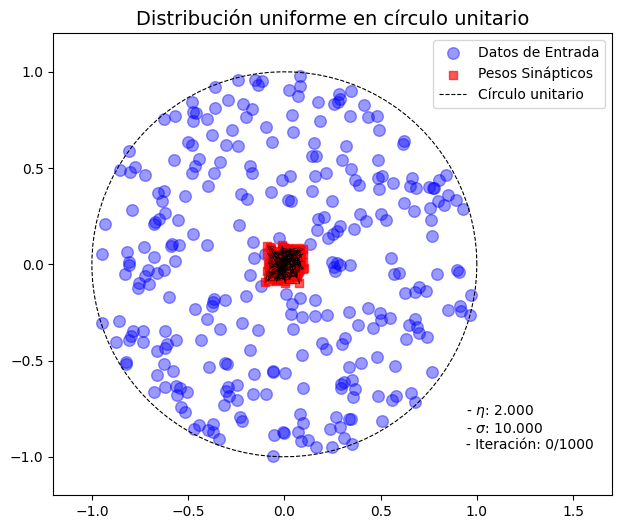

 10%|▉         | 99/1000 [00:17<02:27,  6.13it/s]

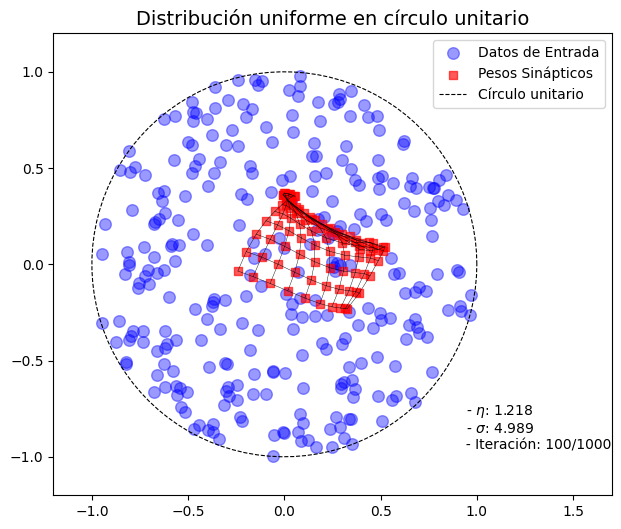

 25%|██▍       | 249/1000 [00:42<02:01,  6.18it/s]

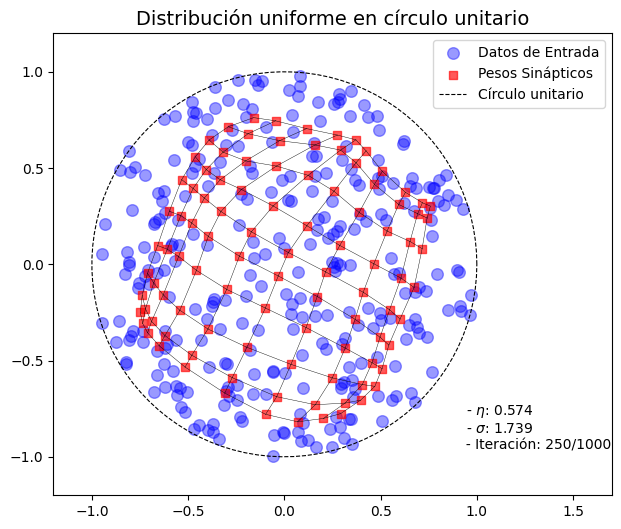

 50%|████▉     | 499/1000 [01:23<01:22,  6.07it/s]

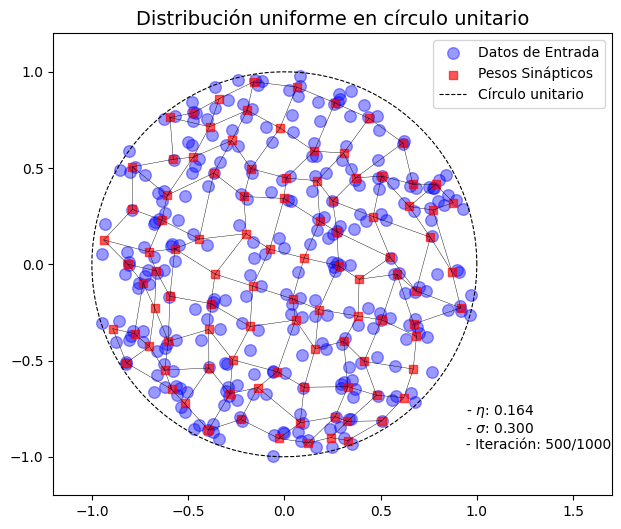

 75%|███████▍  | 749/1000 [02:06<00:43,  5.83it/s]

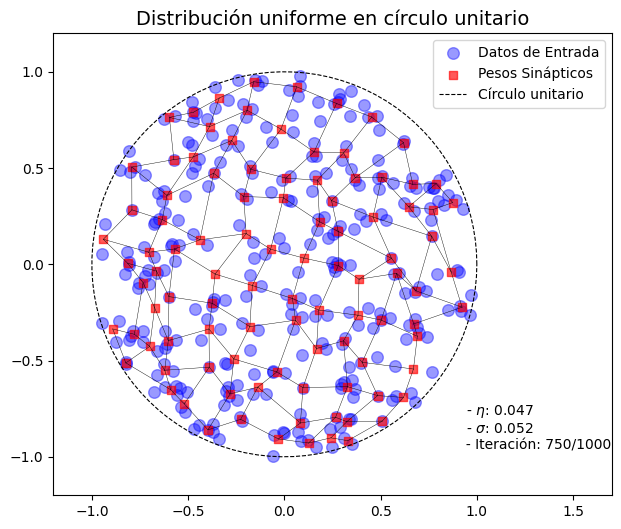

100%|█████████▉| 999/1000 [02:48<00:00,  5.92it/s]

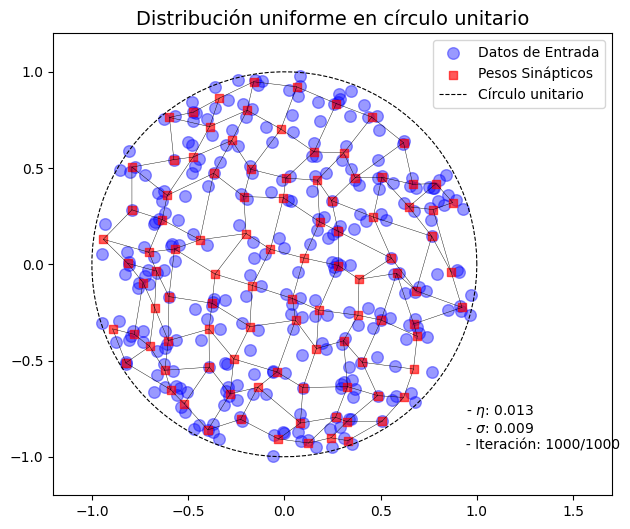

100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]


In [17]:
# CÍRCULO UNITARIO
# Parámetros de la red
gridShape = (10, 10)
inputSize = 2
etaInitial = 2
etaDecay = 0.995
sigmaInitial = 10
sigmaDecay = 0.993
iterations = 1000

# Generación de datos y inicialización de pesos
center = (0, 0)
radius = 1
X = uniformCircleInit(gridShape[0] * gridShape[1] * 3, radius=radius, center=center)
W = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Parámetros del gráfico
xLim = np.array([-1.2, 1.7]) * radius + center
yLim = np.array([-1.2, 1.2]) * radius + center
circValues = np.linspace(0, 2 * np.pi, 100)
lineFmts = '--k'
lineWidths = 0.8
labels = 'Círculo unitario'
boundary = [(radius * np.cos(circValues), radius * np.sin(circValues), lineFmts, lineWidths, labels)]
title = 'Distribución uniforme en círculo unitario'
plotParameters = (None, None, boundary, xLim, yLim, title)
# Gráfico inicial
parametersInfo = (len(X), W.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W, X, plotParameters, parametersInfo, 'circle', save=True)

# Entrenamiento red de Kohonen
W = kohonenTrain(W, X, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters, eta=etaInitial, etaDecay=etaDecay, sigma=sigmaInitial, sigmaDecay=sigmaDecay, iterationsAmount=iterations, shape='circle')


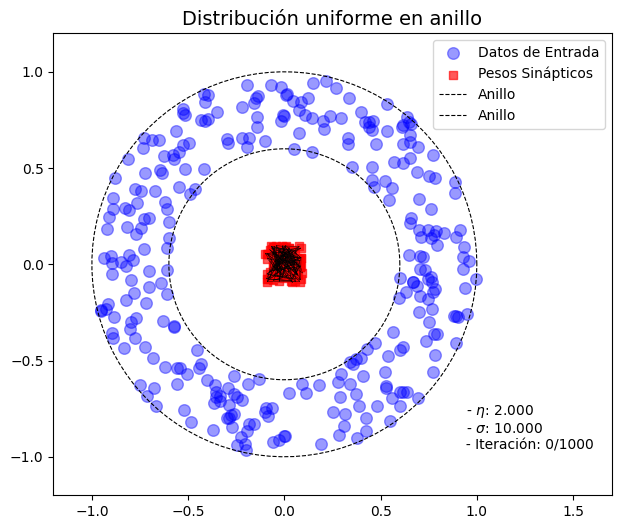

 10%|▉         | 99/1000 [00:16<02:26,  6.16it/s]

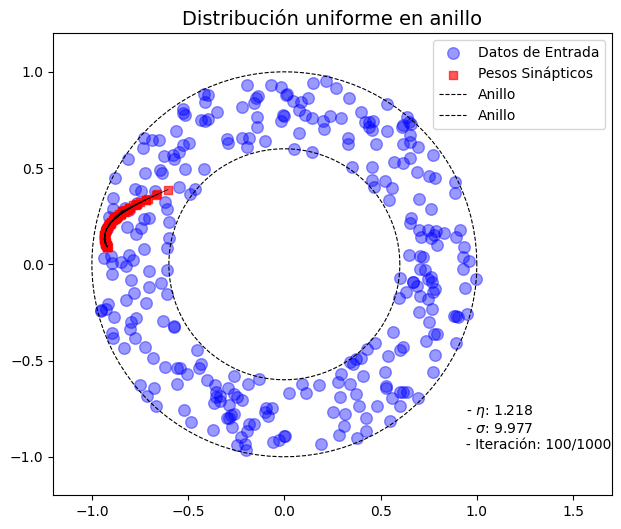

 25%|██▍       | 249/1000 [00:41<02:01,  6.17it/s]

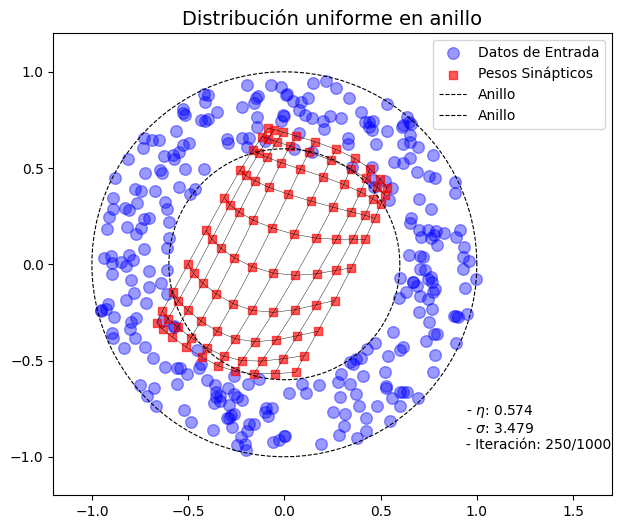

 50%|████▉     | 499/1000 [01:22<01:21,  6.17it/s]

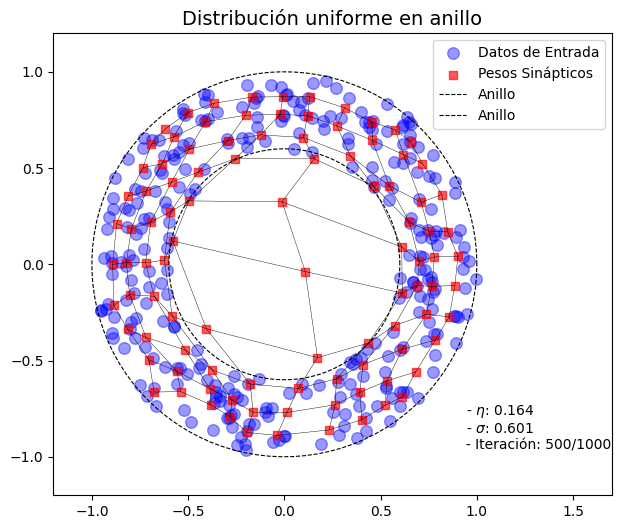

 75%|███████▍  | 749/1000 [02:04<00:42,  5.91it/s]

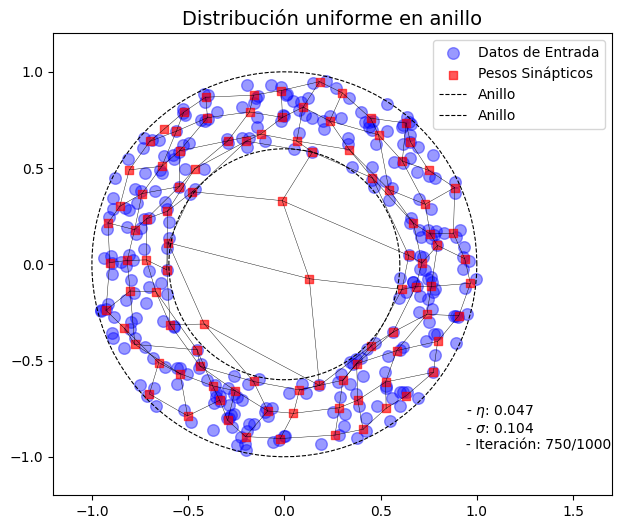

100%|█████████▉| 999/1000 [02:48<00:00,  6.07it/s]

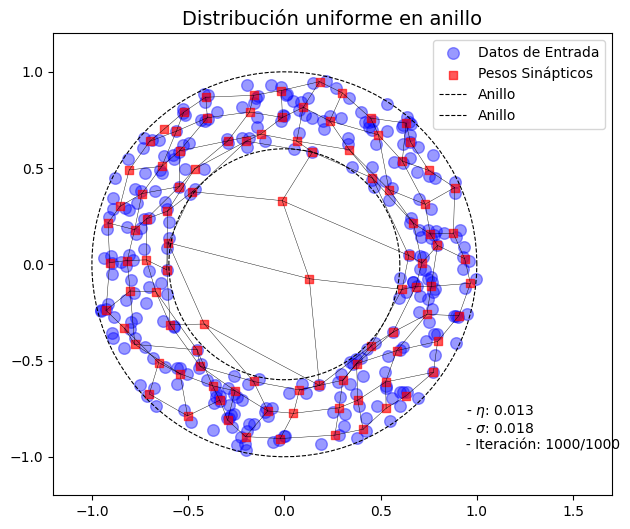

100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]


In [27]:
# ANILLO
# Generación de datos y inicialización de pesos
center = (0, 0)
innerRadius = 0.6
outerRadius = 1.0
X_ring = uniformRingInit(gridShape[0] * gridShape[1] * 3, innerRadius=innerRadius, outerRadius=outerRadius, center=center)
W_ring = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Parámetros del gráfico
xLim_ring = np.array([-1.2, 1.7]) * outerRadius + center
yLim_ring = np.array([-1.2, 1.2]) * outerRadius + center
ringValues = np.linspace(0, 2 * np.pi, 100)
lineFmts = '--k'
lineWidths = 0.8
labels_ring = 'Anillo'
boundary_ring = [(innerRadius * np.cos(ringValues), innerRadius * np.sin(ringValues), lineFmts, lineWidths, labels_ring),
                 (outerRadius * np.cos(ringValues), outerRadius * np.sin(ringValues), lineFmts, lineWidths, labels_ring)]
title_ring = 'Distribución uniforme en anillo'
plotParameters_ring = (None, None, boundary_ring, xLim_ring, yLim_ring, title_ring)
# Gráfico inicial
parametersInfo_ring = (len(X_ring), W_ring.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W_ring, X_ring, plotParameters_ring, parametersInfo_ring, 'ring', save=True)

# Entrenamiento red de Kohonen
W_ring = kohonenTrain(W_ring, X_ring, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters_ring, eta=etaInitial, etaDecay=etaDecay, sigma=20, sigmaDecay=sigmaDecay, iterationsAmount=iterations, shape='ring')

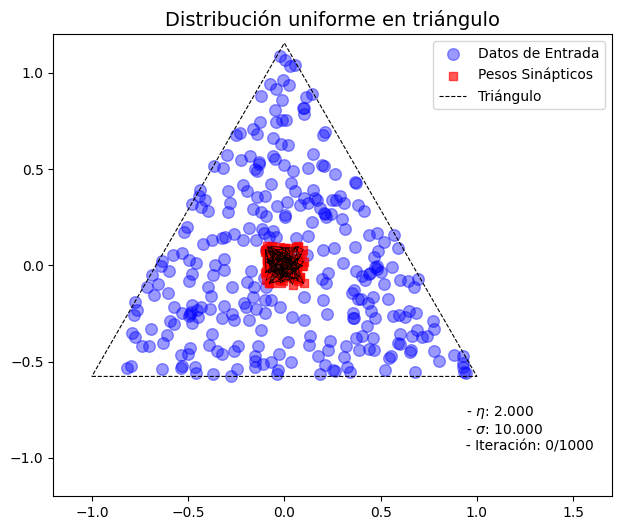

 10%|▉         | 99/1000 [00:16<02:27,  6.13it/s]

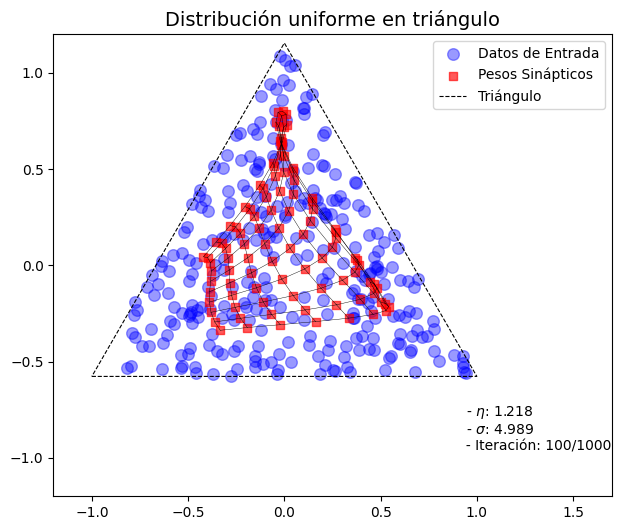

 25%|██▍       | 249/1000 [00:41<02:02,  6.15it/s]

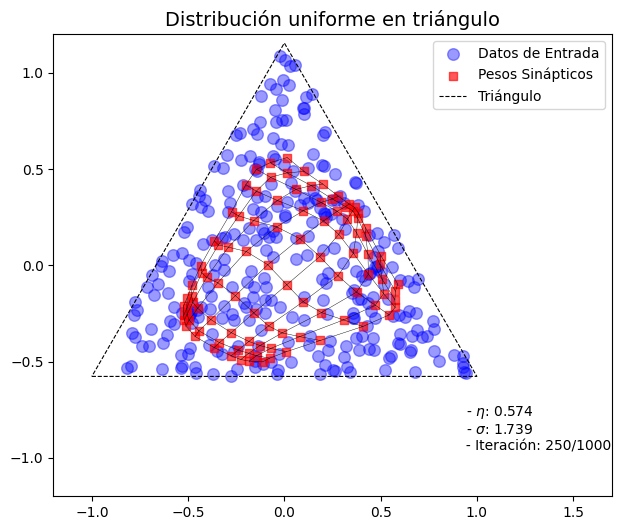

 50%|████▉     | 499/1000 [01:22<01:20,  6.22it/s]

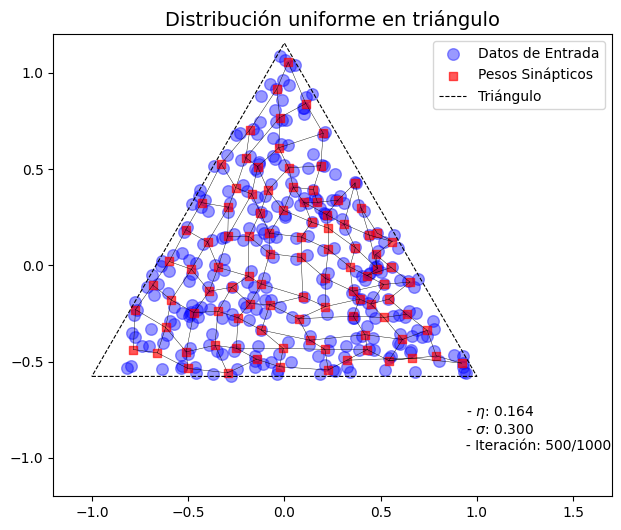

 75%|███████▍  | 749/1000 [02:05<00:45,  5.47it/s]

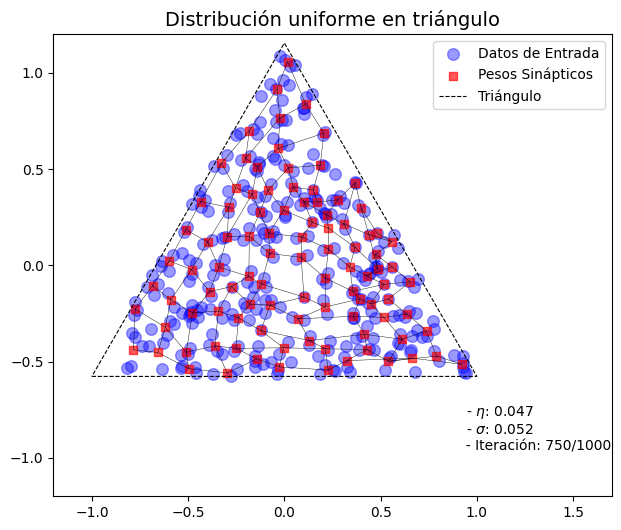

100%|█████████▉| 999/1000 [02:46<00:00,  6.11it/s]

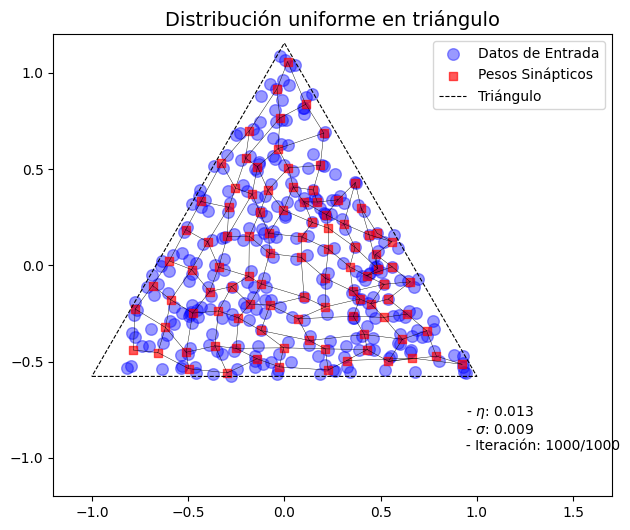

100%|██████████| 1000/1000 [02:47<00:00,  5.97it/s]


In [29]:
# TRIÁNGULO EQUILÁTERO
# Generación de datos y inicialización de pesos
center = (0, 0)
side_length = 2.0
X_triangle = uniformTriangleInit(gridShape[0] * gridShape[1] * 3, side_length=side_length, center=center)
W_triangle = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Parámetros del gráfico
xLim_triangle = np.array([-1.2, 1.7]) + center
yLim_triangle = np.array([-1.2, 1.2]) + center
triangleVertices = np.array([
    [0, 0],
    [side_length, 0],
    [side_length / 2, side_length * np.sqrt(3) / 2]
]) - [side_length / 2, side_length * np.sqrt(3) / 6]
triangleVertices = np.vstack([triangleVertices, triangleVertices[0]])
lineFmts = '--k'
lineWidths = 0.8
labels_triangle = 'Triángulo'
boundary_triangle = [(triangleVertices[:, 0], triangleVertices[:, 1], lineFmts, lineWidths, labels_triangle)]
title_triangle = 'Distribución uniforme en triángulo'
plotParameters_triangle = (None, None, boundary_triangle, xLim_triangle, yLim_triangle, title_triangle)
# Gráfico inicial
parametersInfo_triangle = (len(X_triangle), W_triangle.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W_triangle, X_triangle, plotParameters_triangle, parametersInfo_triangle, 'triangle', save=True)

# Entrenamiento red de Kohonen
W_triangle = kohonenTrain(W_triangle, X_triangle, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters_triangle, eta=etaInitial, etaDecay=etaDecay, sigma=sigmaInitial, sigmaDecay=sigmaDecay, iterationsAmount=iterations, shape='triangle')

2. Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con
una red de Kohonen.

<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Lucas\AppData\Local\Temp\ipykernel_33872\1036435652.py:17: SyntaxWarning: invalid escape sequence '\e'
  '''


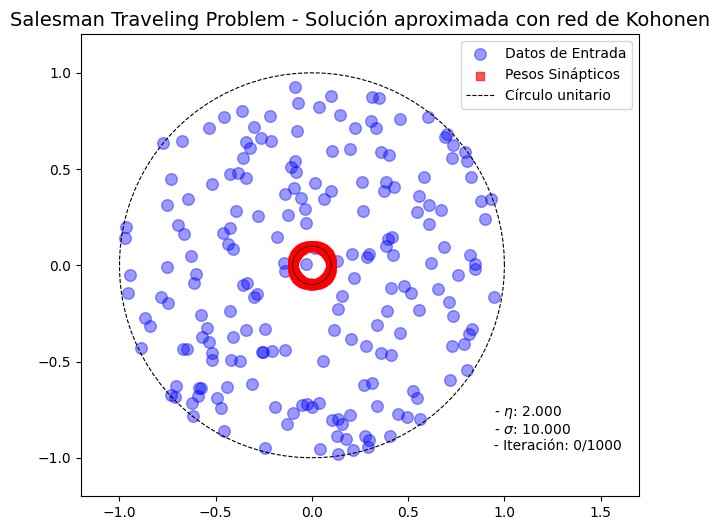

 10%|▉         | 99/1000 [01:30<13:39,  1.10it/s]

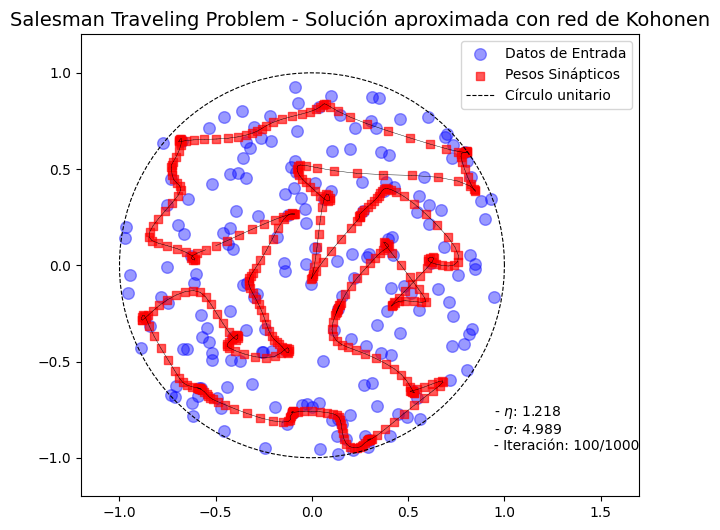

 25%|██▍       | 249/1000 [03:48<11:16,  1.11it/s]

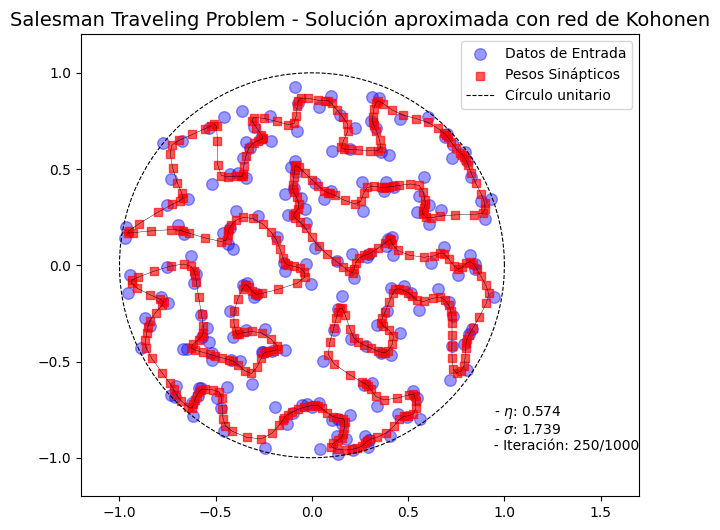

 50%|████▉     | 499/1000 [07:39<07:51,  1.06it/s]

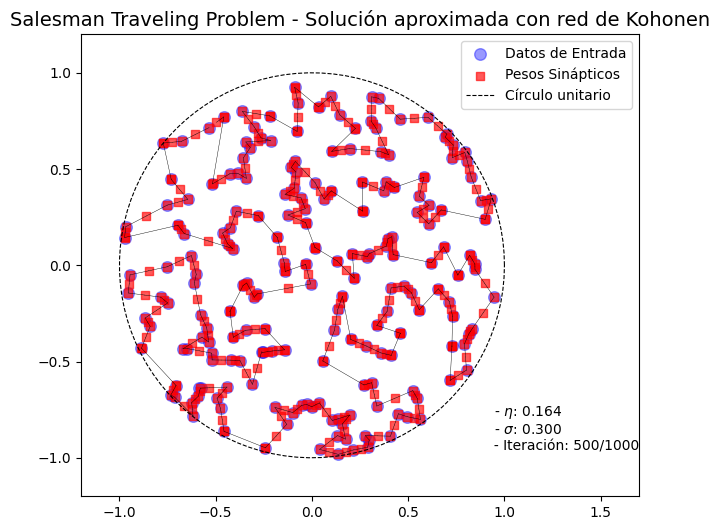

 75%|███████▍  | 749/1000 [13:42<06:40,  1.60s/it]

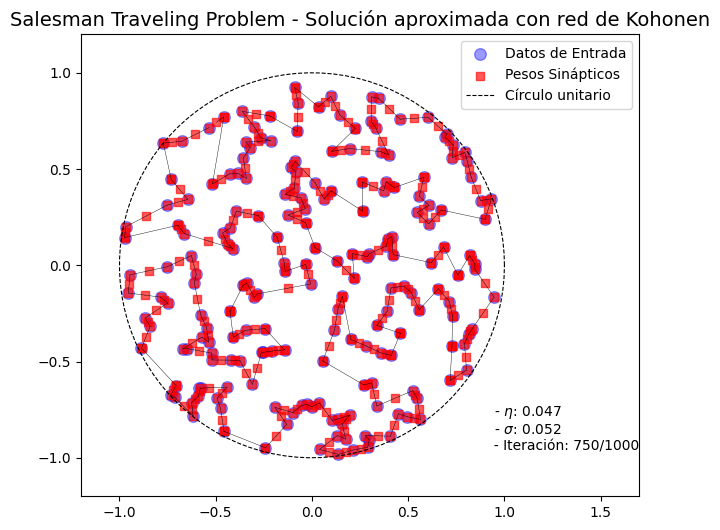

100%|█████████▉| 999/1000 [19:13<00:01,  1.08s/it]

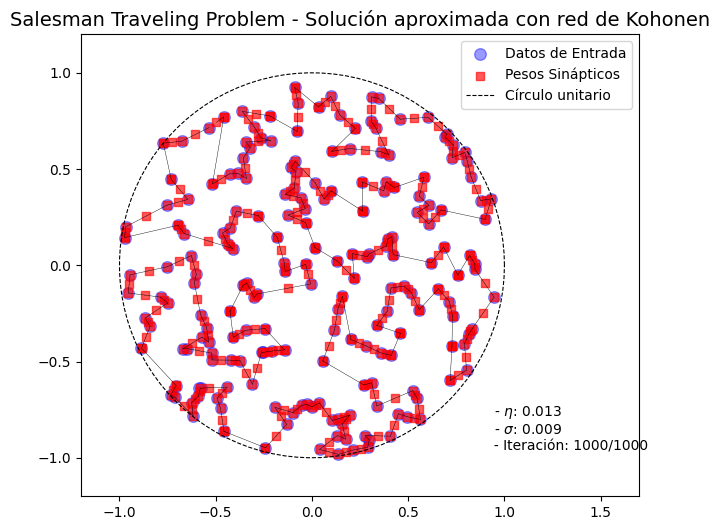

100%|██████████| 1000/1000 [19:15<00:00,  1.16s/it]


In [42]:
# TRAVELING SALESMAN PROBLEM

def initializeRadiusWeights(N, radius=0.1, center=(0., 0.)):
    phi = np.linspace(0, 2 * np.pi, N, endpoint=False)
    return np.array([radius * np.cos(phi), radius * np.sin(phi)]).T + center

def computeCircularDistances(gridShape, winner):
    len_ = gridShape[1]
    distances = np.zeros((1, len_))
    for i in range(len_):
        distances[0][i] = np.min((np.abs(i - winner[1]), len_ - np.max((i, winner[1])) + np.min((i, winner[1]))))
    return distances

# Parámetros del problema
cities_amount = 200
m = 2
N = int(cities_amount * m)
grid_shape = (1, N)
input_size = 2

# Generar ciudades y pesos iniciales
center = (0, 0)
radius = 1
X = uniformCircleInit(cities_amount, radius=radius, center=center)
W = np.reshape(initializeRadiusWeights(N, radius=0.1, center=center), (grid_shape[0], grid_shape[1], input_size))

# Parámetros de entrenamiento
eta_initial = 2
eta_decay = 0.995
sigma_initial = 10
sigma_decay = 0.993
iterations = 1000

# Parámetros de gráfico
x_lim = np.array([-1.2, 1.7]) * radius + center
y_lim = np.array([-1.2, 1.2]) * radius + center
circle_line = np.linspace(0, 2 * np.pi, 100)
line_fmts = '--k'
line_widths = 0.8
labels = 'Círculo unitario'
boundary = [(radius * np.cos(circle_line), radius * np.sin(circle_line), line_fmts, line_widths, labels)]
title = 'Salesman Traveling Problem - Solución aproximada con red de Kohonen'
plot_parameters = (None, None, boundary, x_lim, y_lim, title)
# Gráfico inicial
parameters_info = (len(X), W.shape, eta_initial, sigma_initial, iterations, 0)
updateGraph(W, X, plot_parameters, parameters_info, 'Salesman', save=True)

# Entrenamiento red de Kohonen
W = kohonenTrain(W, X, grid_shape, computeCircularDistances, neighborhoodFunction, plot_parameters, eta=eta_initial, etaDecay=eta_decay, sigma=sigma_initial, sigmaDecay=sigma_decay, iterationsAmount=iterations, shape='Salesman')


100%|██████████| 200/200 [04:47<00:00,  1.44s/it]


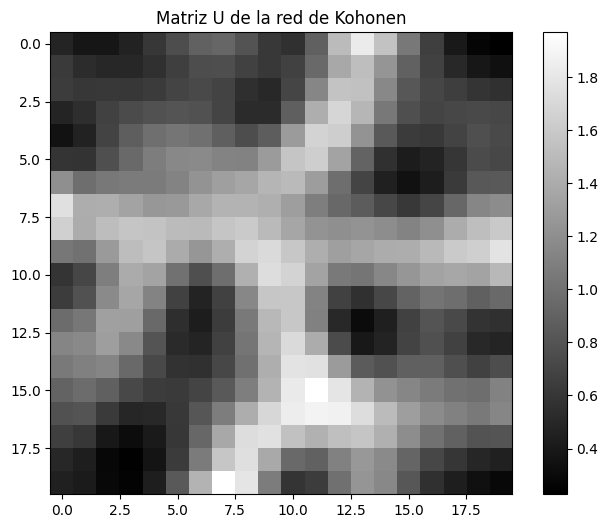

Se identificaron 129 clusters.


In [47]:

# Cargar datos desde el archivo .mat
X = loadmat('datos_para_clustering.mat')['datos']

# Parámetros de la red de Kohonen
grid_shape = (20, 20)  # Tamaño de la red
input_size = X.shape[1]  # Dimensionalidad de los datos
eta_initial = 2
eta_decay = 0.995
sigma_initial = 10
sigma_decay = 0.993
iterations = 200

# Inicializar los pesos de la red de Kohonen
W = initializeWeights((grid_shape[0], grid_shape[1], input_size), scale=0.1)

# Funciones adicionales necesarias
def computeEuclideanDistances(W, x):
    distances = np.linalg.norm(W - x, axis=2)
    return distances

def computeU(W):
    size_x, size_y = W.shape[:2]
    U = np.zeros((size_x, size_y))
    for x in range(size_x):
        for y in range(size_y):
            neighbors = []
            if x > 0:
                neighbors.append(W[x - 1, y])
            if x < size_x - 1:
                neighbors.append(W[x + 1, y])
            if y > 0:
                neighbors.append(W[x, y - 1])
            if y < size_y - 1:
                neighbors.append(W[x, y + 1])
            U[x, y] = np.mean([np.linalg.norm(W[x, y] - neighbor) for neighbor in neighbors])
    return U

# Entrenar la red de Kohonen
def kohonenTrain(W, X, grid_shape, eta_initial, eta_decay, sigma_initial, sigma_decay, iterations):
    eta = eta_initial
    sigma = sigma_initial
    for it in tqdm(range(iterations)):
        np.random.shuffle(X)
        for x in X:
            distances = computeEuclideanDistances(W, x)
            winner_idx = np.unravel_index(np.argmin(distances), distances.shape)
            for i in range(grid_shape[0]):
                for j in range(grid_shape[1]):
                    distance_to_winner = np.linalg.norm(np.array([i, j]) - np.array(winner_idx))
                    h = np.exp(-distance_to_winner**2 / (2 * sigma**2))
                    W[i, j] += eta * h * (x - W[i, j])
        eta *= eta_decay
        sigma *= sigma_decay
    return W

# Entrenar la red
W = kohonenTrain(W, X, grid_shape, eta_initial, eta_decay, sigma_initial, sigma_decay, iterations)

# Calcular y visualizar la matriz U
U_matrix = computeU(W)

plt.figure(figsize=(8, 6))
plt.imshow(U_matrix, cmap='gray')
plt.colorbar()
plt.title('Matriz U de la red de Kohonen')
plt.show()

# Verificar presencia de clusters
clusters = np.argwhere(U_matrix > np.mean(U_matrix) + 0.5 * np.std(U_matrix))
print(f'Se identificaron {len(clusters)} clusters.')
